AnnData object with n_obs × n_vars = 3003 × 31053
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'clusters', 'cell_type'
    var: 'gene_ids', 'feature_types', 'mito', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'clusters_colors', 'dendrogram_clusters', 'hvg', 'leiden', 'neighbors', 'pca', 'rank_genes_groups', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'raw_count'
    obsp: 'connectivities', 'distances'
Number of spots (observations): 3003
Number of genes (variables): 31053
Shape of gene expression matrix: (3003, 31053)
Spatial c

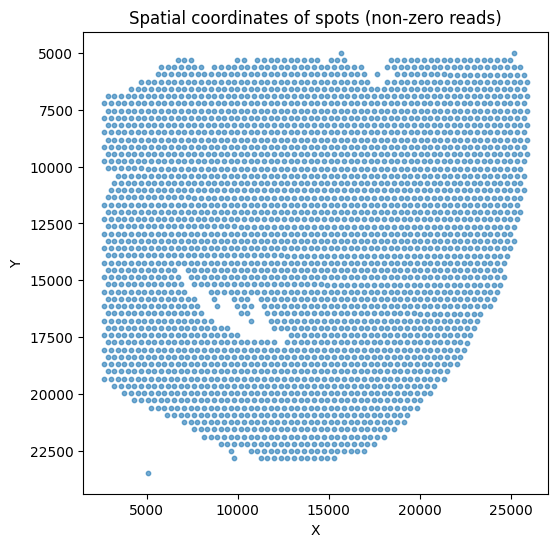

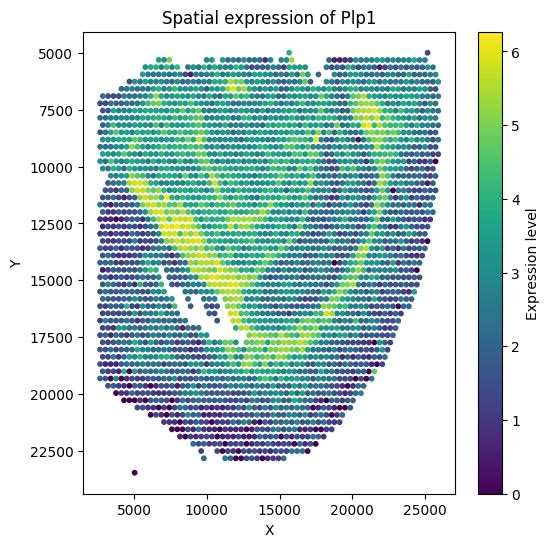

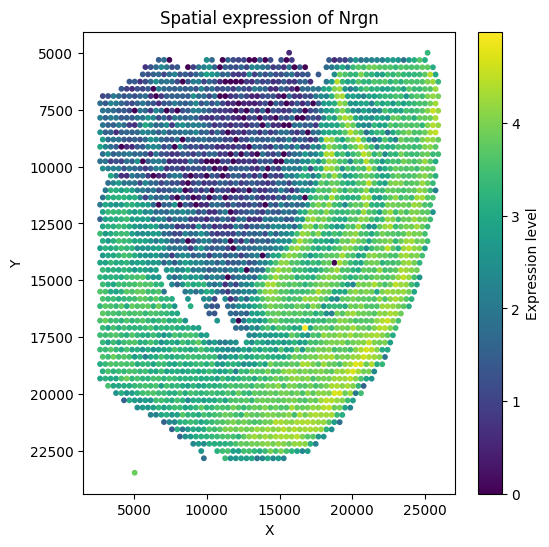

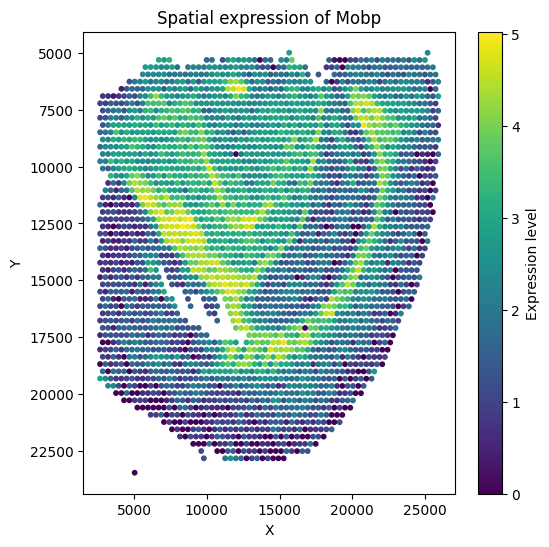

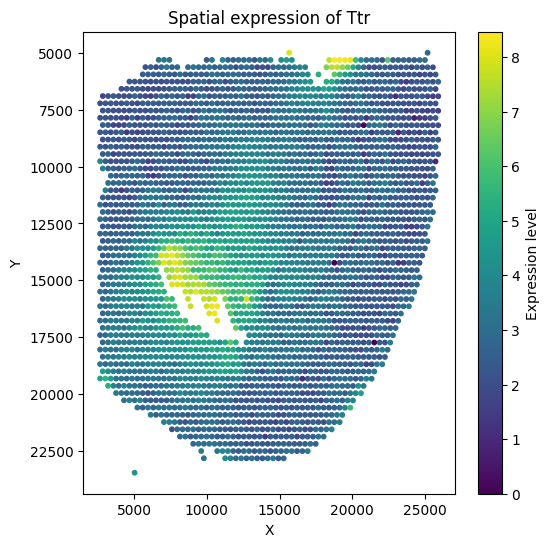

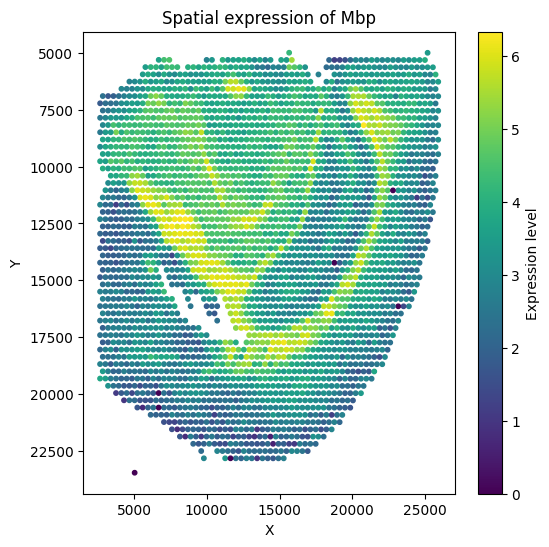

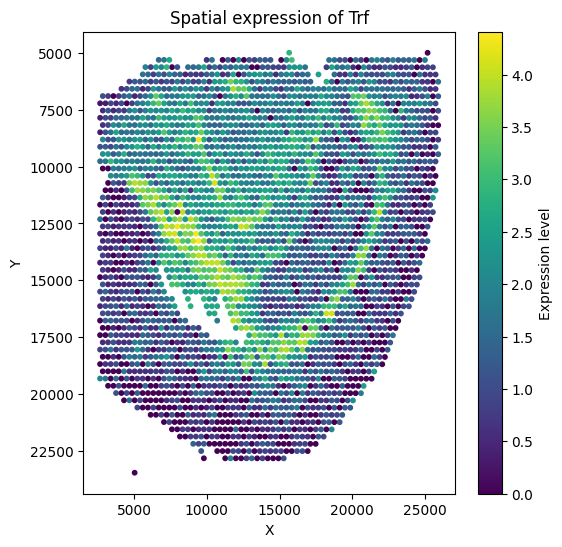

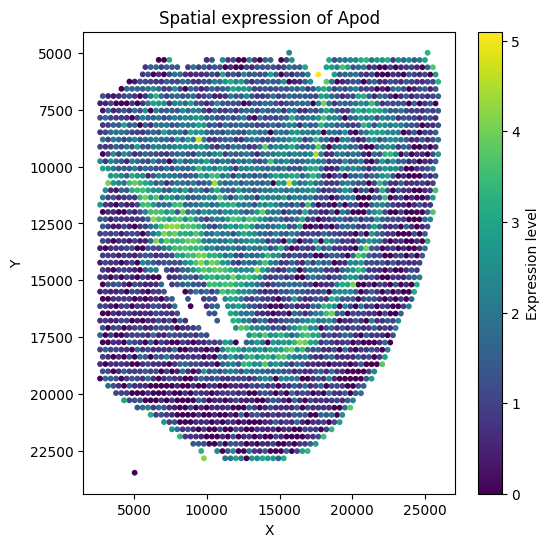

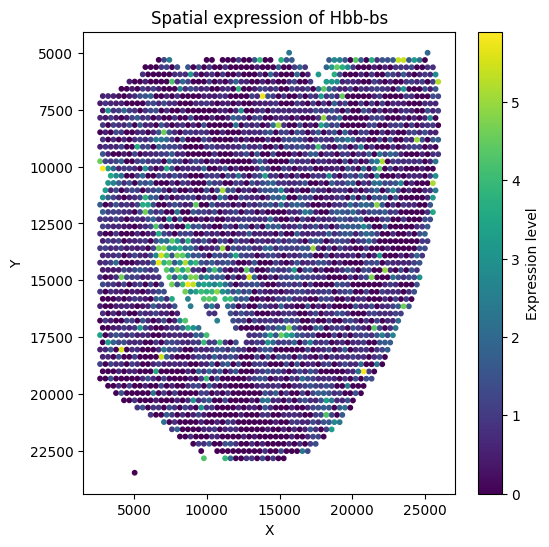

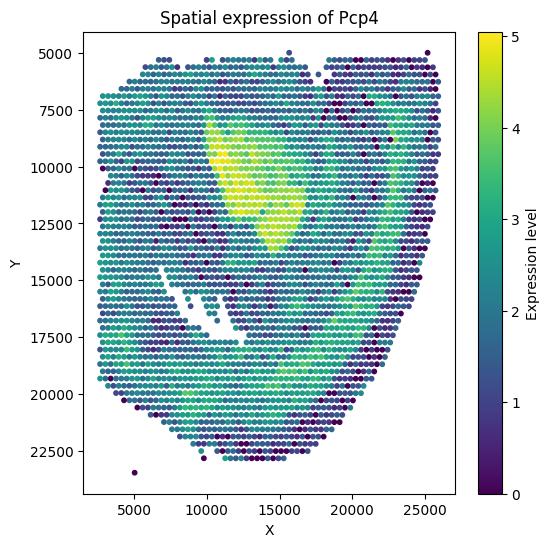

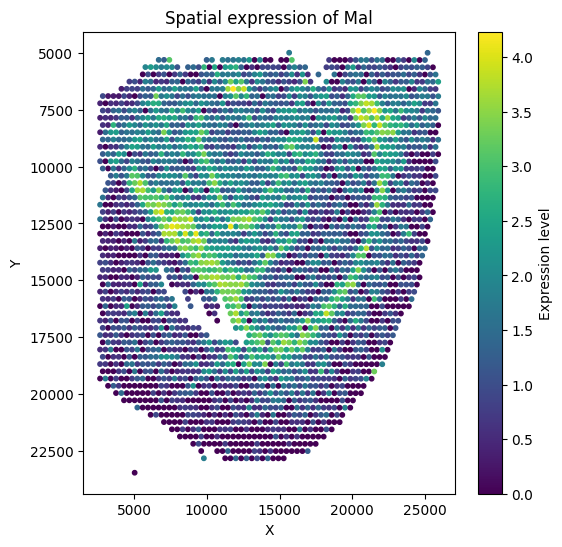

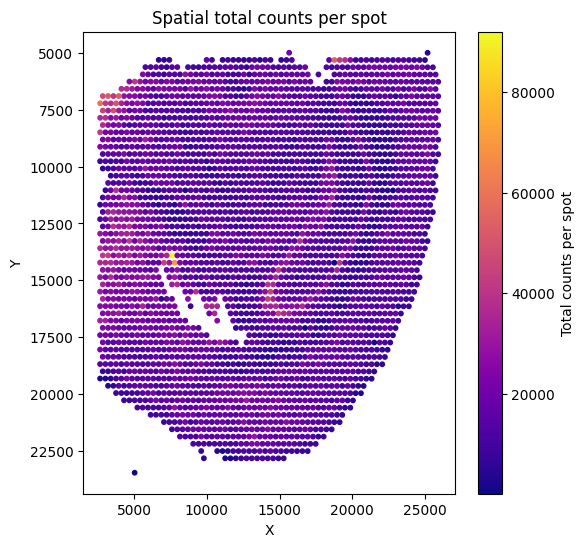

In [3]:
#Download the data and import it to Python. You might need to install a specific Python package like h5py or scanpy to read certain data types.

import scanpy as sc

# Load the dataset (replace with your actual file path)
adata = sc.read_h5ad("C:/Users/Redzuan/Projects/st_data/Data/GSM6604495_IVH_7d_2_110_matrix_processed.h5ad")

# Basic summary
print(adata)

print(f"Number of spots (observations): {adata.n_obs}")
print(f"Number of genes (variables): {adata.n_vars}")
print("Shape of gene expression matrix:", adata.shape)
print("Spatial coordinates (first 5 spots):")
print(adata.obsm['spatial'][:5])

import numpy as np
import pandas as pd

# Convert sparse matrix to dense if needed
X = adata.X.toarray() if not isinstance(adata.X, np.ndarray) else adata.X

# Compute mean and variance per gene across all spots
mean_expression = X.mean(axis=0)
variance_expression = X.var(axis=0)

# Create dataframe
gene_stats = pd.DataFrame({
    'gene': adata.var_names,
    'mean_expression': mean_expression,
    'variance': variance_expression
})

# Top 20 genes by mean expression
top_mean = gene_stats.sort_values(by='mean_expression', ascending=False).head(20)

# Top 20 genes by variance
top_var = gene_stats.sort_values(by='variance', ascending=False).head(20)

# Save to CSV
top_mean.to_csv("day7_top_genes_by_mean_expression.csv", index=False)
top_var.to_csv("day7_top_genes_by_variance.csv", index=False)

# Show preview
print("Top 5 genes by mean:")
print(top_mean.head())
print("\nTop 5 genes by variance:")
print(top_var.head())


############Task 3 - Scatterplot of Sample Coordinates
import matplotlib.pyplot as plt

# Get coordinates
coords = adata.obsm['spatial']

# Filter out spots with zero total counts
nonzero_mask = adata.obs['total_counts'] > 0
coords_filtered = coords[nonzero_mask]

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(coords_filtered[:, 0], coords_filtered[:, 1], s=10, alpha=0.6)
plt.title("Spatial coordinates of spots (non-zero reads)")
plt.gca().invert_yaxis()  # For Visium slide orientation
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


############## Plot Expression of Top 10 Genes
# Load top genes from CSV if you restarted
top_mean = pd.read_csv("day7_top_genes_by_variance.csv")

# Plot expression for top 10 genes
top_10_genes = top_mean['gene'].head(10)

for gene in top_10_genes:
    if gene not in adata.var_names:
        print(f"Skipping {gene}: not found in dataset.")
        continue

    gene_idx = adata.var_names.get_loc(gene)
    expr = adata.X[:, gene_idx].toarray().flatten() if not isinstance(adata.X, np.ndarray) else adata.X[:, gene_idx]

    plt.figure(figsize=(6, 6))
    plt.scatter(coords[:, 0], coords[:, 1], c=expr, cmap='viridis', s=10)
    plt.colorbar(label='Expression level')
    plt.title(f"Spatial expression of {gene}")
    plt.gca().invert_yaxis()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
    
############## Visualize Other Parameters (e.g. Total Counts)
# Get total counts
total_counts = adata.obs['total_counts']

plt.figure(figsize=(6, 6))
plt.scatter(coords[:, 0], coords[:, 1], c=total_counts, cmap='plasma', s=10)
plt.colorbar(label='Total counts per spot')
plt.title("Spatial total counts per spot")
plt.gca().invert_yaxis()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
